# 4장. 모집단과 표본
## 4.1. 정규분포

- 모듈:`import numpy as np`
  - 수열 생성: `np.linspace(start, stop, num)`
      - start에서 stop까지 num개 만큼의 수열을 생성 (endPoint default가 true)
  

- 모듈: `from scipy.stats import norm`

    0. 정규분포를 따르는 **확률변수** 생성: `n = norm(loc = 0, scale = 1)`
        - loc은 mean. scale은 sd (default값 있으므로 생략 가능)
    1. **확률밀도함수 구하기**: `pdf(n, loc = 0, scale = 1)`
        - n이라는 확률변수의 밀도함수
    2. **누적분포 구하기**: `cdf(x, loc = 0, scale = 1)`
        - 분위수 x까지의 [정규분포 아래 넓이]를 return
        - `norm.cdf(x, loc, scale)` == `n.cdf(x)`
    3. **정규분포의 분위수 구하기**: `ppf(q, loc = 0, scale 1)`
        - [분위수]까지의 정규분포 아래 넓이가 q
        - `norm.ppf(q, loc, scale)` == `n.ppf(q)`

    
### 4.1.1. 정규분포의 확률밀도함수 그리기

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# numpy
x = np.linspace(-3, 3, 100, endpoint = True)
print(x)

# scipy norm
fx = norm.pdf(x, loc = 0, scale = 1)
print(fx)

# pyplot
plt.plot(x, fx, color = "C0", linewidth = 1.0, linestyle = "-")
plt.title("Standard Normal Distribution")
plt.show()

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

<Figure size 640x480 with 1 Axes>

### 4.1.2. 정규분포의 확률 계산

In [27]:
n = norm(loc = 2000, scale = 200)
print(n.cdf(2500))

print(norm.cdf(2500, 2000, 200)) # equivalent

0.9937903346742238
0.9937903346742238


In [21]:
1 - n.cdf(1800)

0.8413447460685429

### 4.1.3. 정규분위수의 계산

In [4]:
n = norm(loc = 100, scale = 15)
n.ppf(0.98)

# print(norm.ppf(0.98, 100, 15))

130.80623365947733


## 4.2. 이항분포

- 모듈:`import numpy as np`
  - 수열 생성: `np.arange(start, stop)`
      - start 이상 stop 미만의 정수 배열
  

- 모듈: `from scipy.stats import norm`

    0. 이항분포를 따르는 확률변수 생성: `b = binom(n, p)`
        - n은 1의 개수, p는 1이 나올 확률
    1. **밀도함수 구하기**: `pmf(k, n, p, loc = 0)`
        - k이라는 확률변수의 밀도함수. loc은 default값 있음
        - k에 확률변수 아닌 상수 넣으면 P(X=k)를 구해줌
    2. **누적분포 구하기**: `cdf(k, n, p, loc = 0)`
        - 분위수 k까지의 [누적확률]을 return
        - `binom.cdf(k, n, p)` == `b.cdf(k)`

### 4.2.1. 이항분포의 밀도함수 그리기

[0 1 2 3 4 5 6]


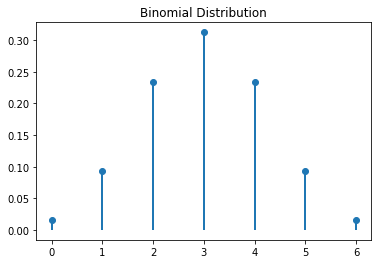

In [6]:
from scipy.stats import binom

k = np.arange(0, 7)
print(k)

px = binom.pmf(k, n = 6, p = 0.5)

plt.plot(k, px, 'C0o', linewidth = 1.0)
plt.vlines(k, 0, px, color = "C0", linewidth = 2.0)
plt.title("Binomial Distribution")
plt.show()

### 4.2.2. 이항분포의 확률 계산

In [9]:
b = binom(n = 5, p = 0.1)
b.pmf(3)

# binom.pmf(3, 5, 0.1)

0.008099999999999996

In [49]:
b = binom(n = 20, p = 0.1)
b.cdf(5)

0.988746865835491

### 4.2.3. 이항분포의 정규 근사

[ 0  1  2  3  4  5  6  7  8  9 10]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50]


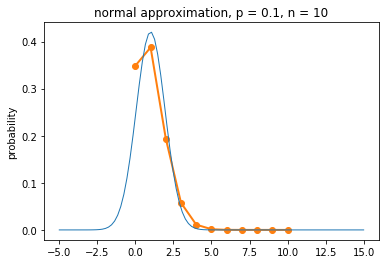

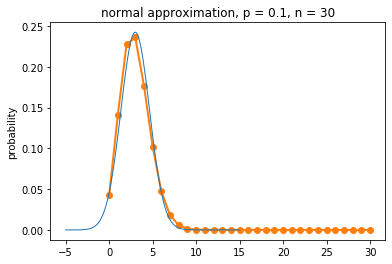

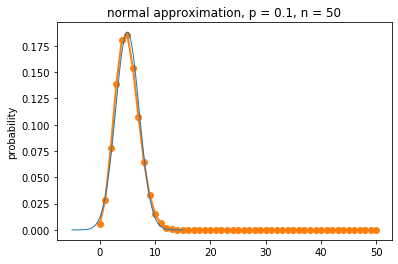

In [28]:
# np >= 5 
# n(1-p) >= 5

p = 0.1 # 0.5이면 더 정규근사가 잘됨!
n = [10, 30, 50] # 클수록 더 정규근사가 잘됨!

for i in range(3):
    plt.figure(figsize = (6,4))
    plt.title("normal approximation, p = 0.1, n = %i" % n[i])
    plt.ylabel("probability")
    
    # 이항분포 그래프 그리기
    k = np.arange(0, n[i] + 1)
    print(k)
    
    px = binom.pmf(k, n = n[i], p = p)
    plt.plot(k, px, 'C1o')
    plt.plot(k, px, color = 'C1', linewidth = 2.0)
    
    # 근사된 정규분포 그래프 그리기
    x = np.linspace(-5, 15, 100, endpoint = True)
    mu = n[i] * p
    sd = np.sqrt(n[i] * p * (1 - p))
    fx = norm.pdf(x, loc = mu, scale = sd)
    plt.plot(x, fx, color = "C0", linewidth = 1.0, linestyle = "-")

## 4.3. 표본 평균의 분포

- 모듈 numpy
    - uniform 분포 생성: `np.random.seed(1)`
- 모듈 `from scipy.stats import uniform`
    - uniform 분포에서 random variable를 n개 추출: `uniform.rvs(loc = 0, scale = 1, size = n)`


In [31]:
from scipy.stats import uniform

# 반복 가능한 난수 생성하기. 같은 시드값을 사용하여 항상 동일한 값을 보여준다
np.random.seed(1)

n = 10 # 각 시행에서 추출할 표본의 원소 개수
mean = [] # list of 각 시행에서 추출한 표본의 평균들

for i in range(200): # 201 아니고 200임
    x = uniform.rvs(loc = 0, scale = 1, size = n)
    mean.append(x.mean())

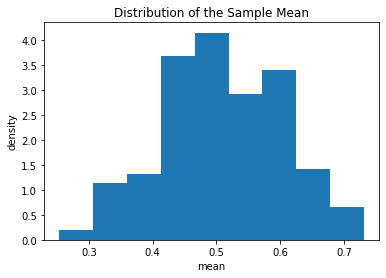

In [34]:
plt.hist(mean, bins = 9, density = True, histtype='bar')
plt.title("Distribution of the Sample Mean")
plt.xlabel("mean")
plt.ylabel("density") # 상대도수(합이 1)
plt.show()

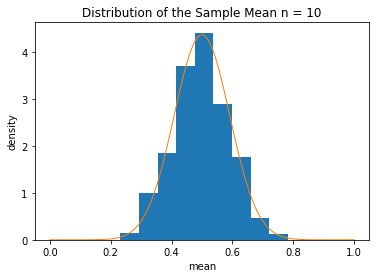

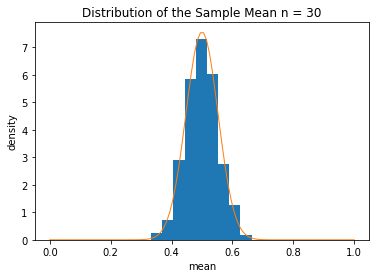

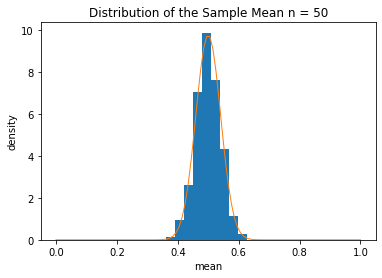

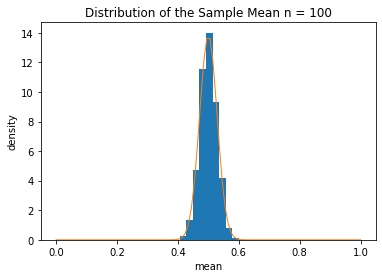

In [68]:
np.random.seed(1)

n = [10, 30, 50, 100]

for i in range(4):
    
    mean = []
    for j in range(1000):
        x = uniform.rvs(loc = 0, scale = 1, size = n[i])
        mean.append(x.mean())
        
    x = np.linspace(0, 1, 100, endpoint = True)
    mu = 0.5
    sd = np.sqrt(1/12)
    fx = norm.pdf(x, loc = mu, scale = sd/np.sqrt(n[i]))
    
    plt.figure(figsize = (6, 4))
    plt.title("Distribution of the Sample Mean n = %i" % n[i])
    plt.xlabel("mean")
    plt.ylabel("density")
    
    plt.hist(mean, bins = 9, color = "C0", density = True, histtype = 'bar')
    plt.plot(x, fx, color = "C1", linewidth = 1.0, linestyle = "-")

### 4.4. 정규분포 분위수 대조도

In [36]:
import pandas

bodydims = pandas.read_csv("bodydims.csv")
bodydims.shape

(507, 8)

In [37]:
bodydims.head(10)

,bii.di,che.de,elb.di,kne.di,age,wgt,hgt,sex
0,26.0,17.7,13.1,18.8,21,65.6,174.0,1
1,28.5,16.9,14.0,20.6,23,71.8,175.3,1
2,28.2,20.9,13.9,19.7,28,80.7,193.5,1
3,29.9,18.4,13.9,20.9,23,72.6,186.5,1
4,29.9,21.5,15.2,20.7,22,78.8,187.2,1
5,27.0,19.6,14.0,18.8,21,74.8,181.5,1
6,30.0,21.9,16.1,20.8,26,86.4,184.0,1
7,29.8,21.8,15.1,21.0,27,78.4,184.5,1
8,26.5,15.5,14.1,18.9,23,62.0,175.0,1
9,28.0,22.5,15.6,21.1,21,81.6,184.0,1


In [38]:
bodydims_m = bodydims[bodydims['sex'] == 1]
bodydims_f = bodydims[bodydims['sex'] == 0]

print(len(bodydims_m))
print(len(bodydims_f))

247
260


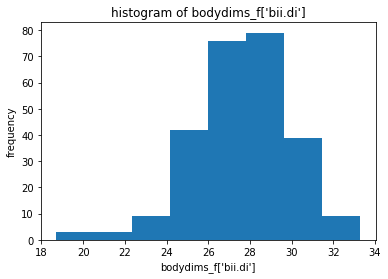

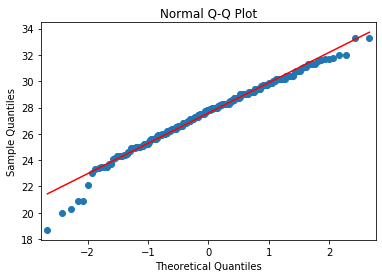

In [39]:
from statsmodels.graphics.gofplots import ProbPlot

plt.figure(figsize = (6, 4))

# 히스토그램
plt.hist(bodydims_f['bii.di'], bins = 8, color = "C0", histtype = 'bar')
plt.title("histogram of bodydims_f['bii.di']")
plt.ylabel("frequency")
plt.xlabel("bodydims_f['bii.di']")

# 정규분포 분위수
QQ = ProbPlot(bodydims_f['bii.di'])
plot = QQ.qqplot(line = 's', color = 'C0', lw = 1)
plt.title("Normal Q-Q Plot")
plt.show()

=> 분석 시 왼쪽 tail쪽이 정규분포를 따르지 않고 있다는 걸 알 수 있음

### 참고) 한글로 캡션다는 법

In [77]:
# fontprop = fm